## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

Lead Conversion Process - Demonstrated as a funnel
Lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

 

Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

 

Goals of the Case Study
There are quite a few goals for this case study.

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.
 

Results Expected

1. A well-commented Jupyter note with at least the logistic regression model, the conversion predictions and evaluation metrics.
2. The word document filled with solutions to all the problems.
3. The overall approach of the analysis in a presentation
i.Mention the problem statement and the analysis approach briefly 
ii.Explain the results in business terms
iii.Include visualisations and summarise the most important results in the presentation
4. A brief summary report in 500 words explaining how you proceeded with the assignment and the learnings that you gathered.

## Import libraries 

In [57]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm

In [58]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200) 
pd.set_option('display.width', 1000)

## Read data

In [59]:
lead = pd.read_csv("Leads.csv")

In [60]:
lead.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


In [61]:
lead.shape

(9240, 37)

In [62]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [63]:
lead = lead.replace('select',np.nan)

In [64]:
lead.isnull().mean().sort_values()

Prospect ID                                      0.000000
I agree to pay the amount through cheque         0.000000
Get updates on DM Content                        0.000000
Update me on Supply Chain Content                0.000000
Receive More Updates About Our Courses           0.000000
Through Recommendations                          0.000000
Digital Advertisement                            0.000000
Newspaper                                        0.000000
X Education Forums                               0.000000
A free copy of Mastering The Interview           0.000000
Magazine                                         0.000000
Search                                           0.000000
Newspaper Article                                0.000000
Last Notable Activity                            0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Total Time Spent on Website                      0.000000
Converted     

In [65]:
lead.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [66]:
# Dropping unique valued columns
lead= lead.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)


In [67]:
# percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)), 2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

## Drop missing Values

### Drop column of more than 40% missing data

In [68]:
lead = lead.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)


In [69]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [70]:
lead.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [71]:
lead['Country'] = lead['Country'].fillna('not provided') 


In [72]:
lead['Specialization'] = lead['Specialization'].fillna('not provided') 
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].fillna('not provided')
lead['What is your current occupation'] = lead['What is your current occupation'].fillna('not provided')

In [73]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [74]:
def slot(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category


lead['Country']= lead.apply(lambda x:slot(x['Country']), axis = 1)
lead['Country'].value_counts()

outside india    6779
not provided     2461
Name: Country, dtype: int64

In [75]:
lead = lead[lead.isnull().sum(axis=1) <1]

In [76]:
# Again checking the percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [77]:
lead = lead.drop('Prospect ID',1)
lead.shape

(9074, 21)

In [78]:
lead.head(3)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,not provided,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,outside india,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,outside india,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened


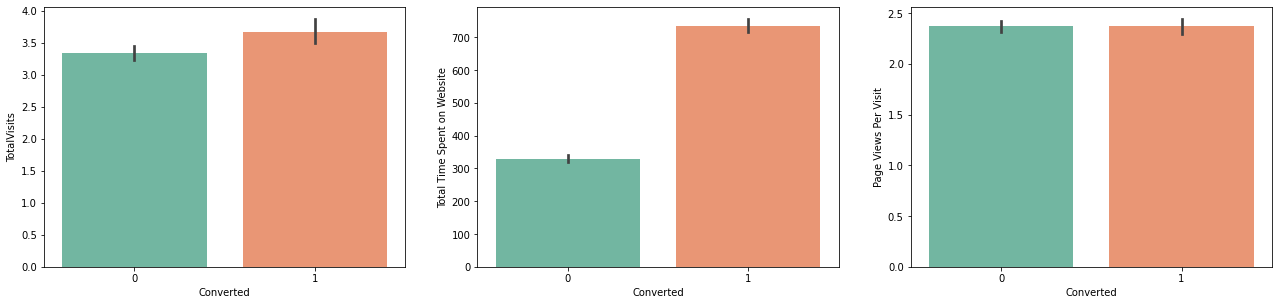

In [79]:
plt.figure(figsize=(22,22))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = lead)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = lead)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = lead)
plt.show()

## Data Preparation

In [80]:
varlist = ['Do Not Email','Do Not Call', 'Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

#define of map
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

lead[varlist]= lead[varlist].apply(binary_map)

In [81]:
lead.head(3)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,not provided,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,outside india,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,outside india,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,1,Email Opened


## Univariate Analysis

Text(0.5, 1.0, 'Specialization')

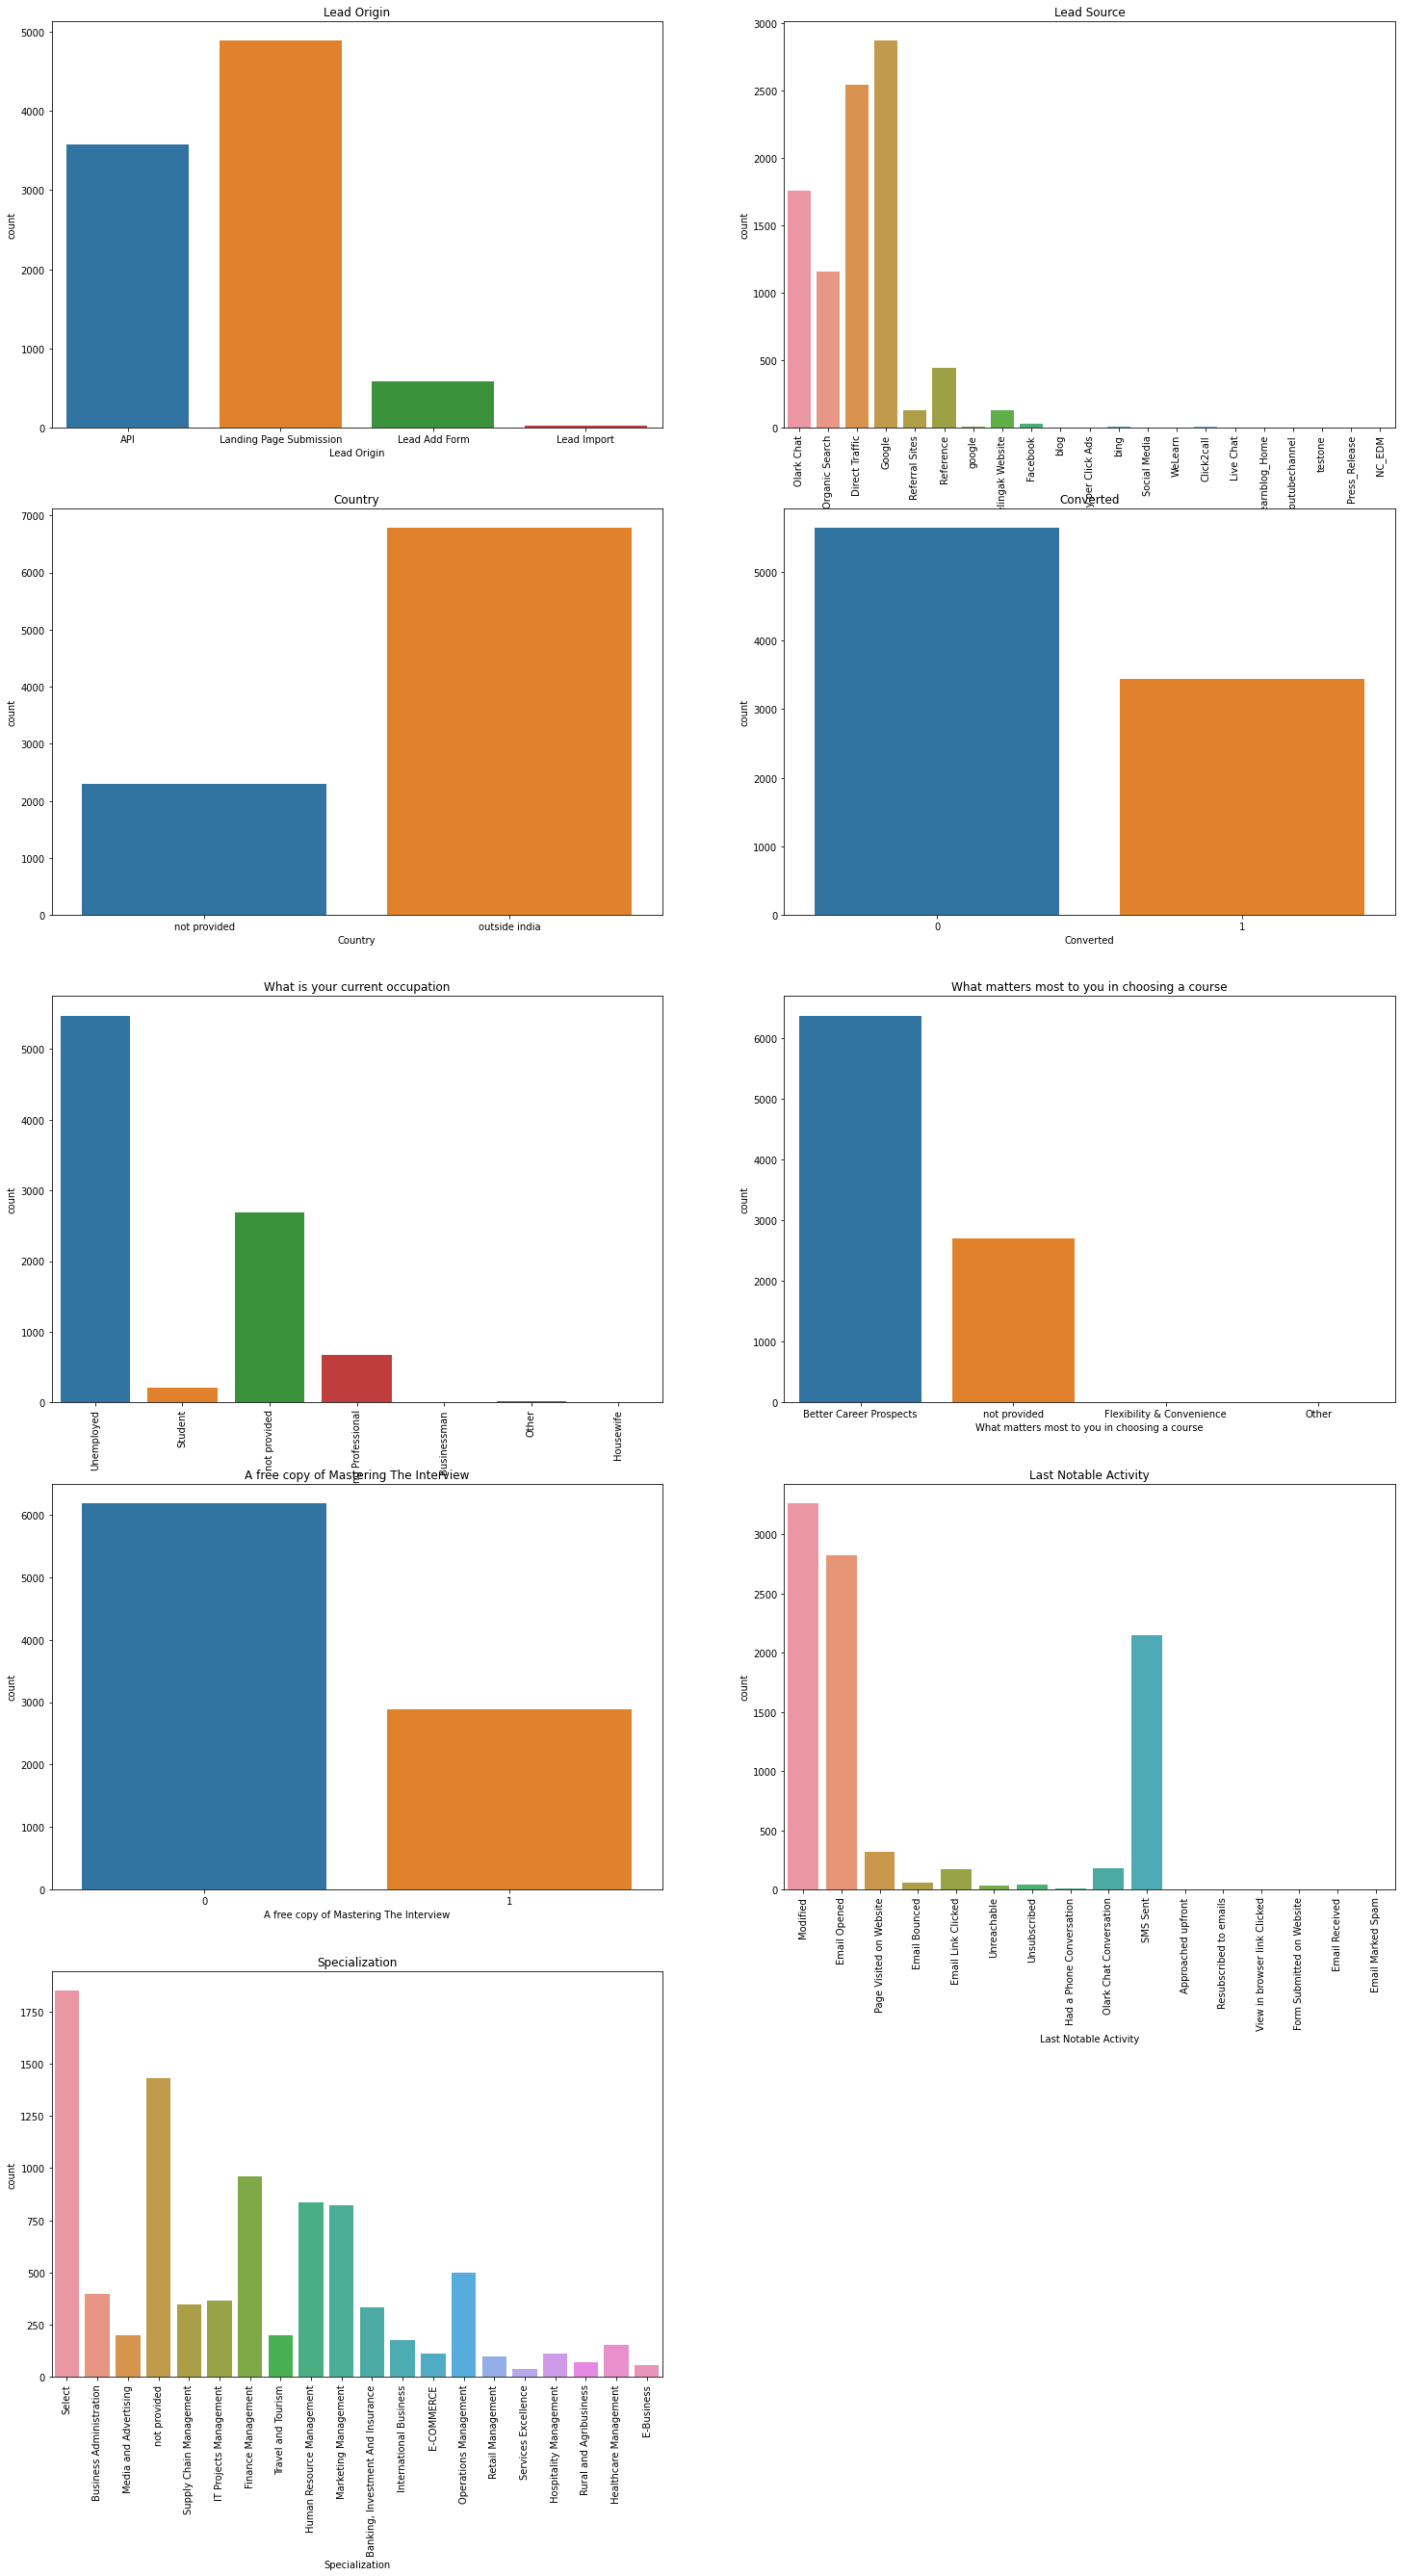

In [82]:
plt.figure(figsize = (25,45))

plt.subplot(5,2,1)
sns.countplot(lead['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(5,2,2)
sns.countplot(lead['Lead Source']).tick_params(axis='x', rotation = 90)

plt.title('Lead Source')

plt.subplot(5,2,3)
sns.countplot(lead['Country'])
plt.title('Country')

plt.subplot(5,2,4)
sns.countplot(lead['Converted'])
plt.title('Converted')

plt.subplot(5,2,5)
sns.countplot(lead['What is your current occupation']).tick_params(axis='x', rotation = 90)

plt.title('What is your current occupation')

plt.subplot(5,2,6)
sns.countplot(lead['What matters most to you in choosing a course'])
plt.title('What matters most to you in choosing a course')

plt.subplot(5,2,7)
sns.countplot(lead['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(5,2,8)
sns.countplot(lead['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.subplot(5,2,9)
sns.countplot(lead['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')




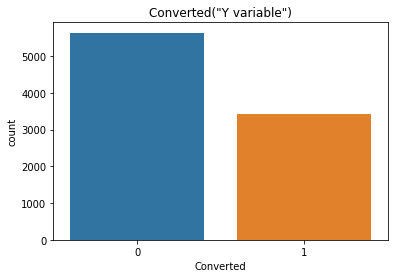

In [83]:
sns.countplot(lead['Converted'])
plt.title('Converted("Y variable")')
plt.show()

In [84]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   int64  
 3   Do Not Call                                    9074 non-null   int64  
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

## Correlation of variable with target

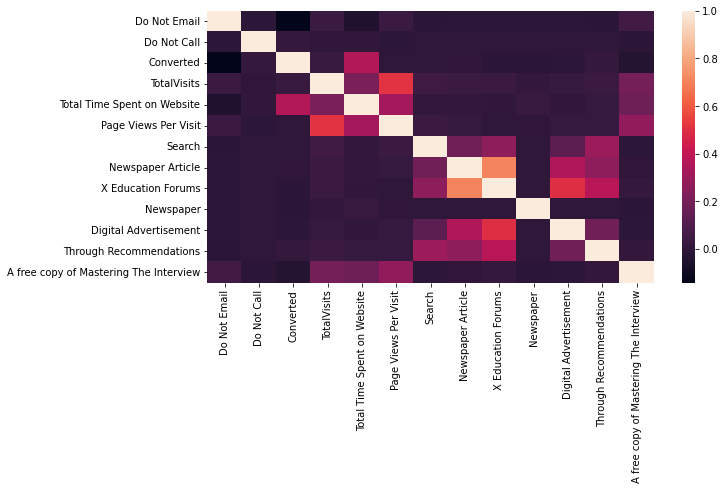

In [85]:
#correlation of variable
plt.figure(figsize=(10,5))
sns.heatmap(lead.corr())
plt.show()

## Relating all the categorical variables


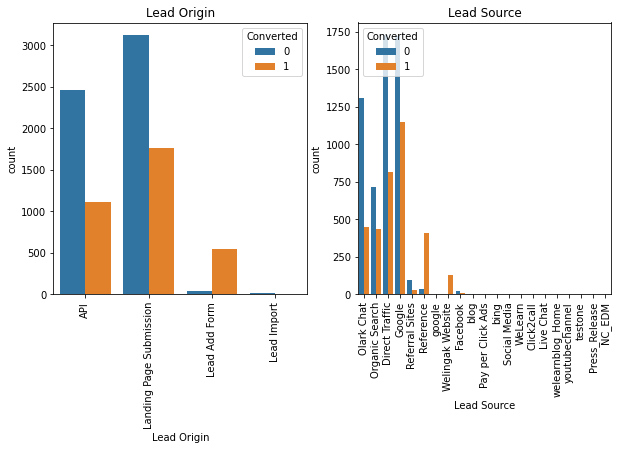

In [86]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data=lead).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data=lead).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()


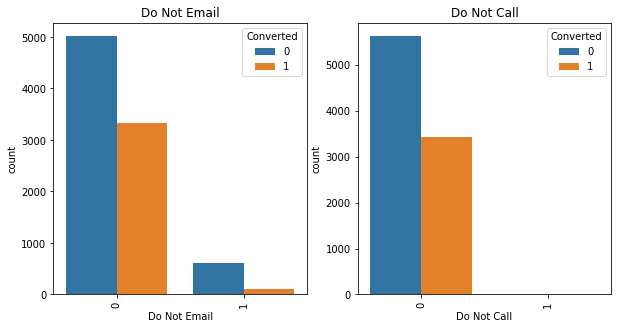

In [87]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data=lead).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data=lead).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

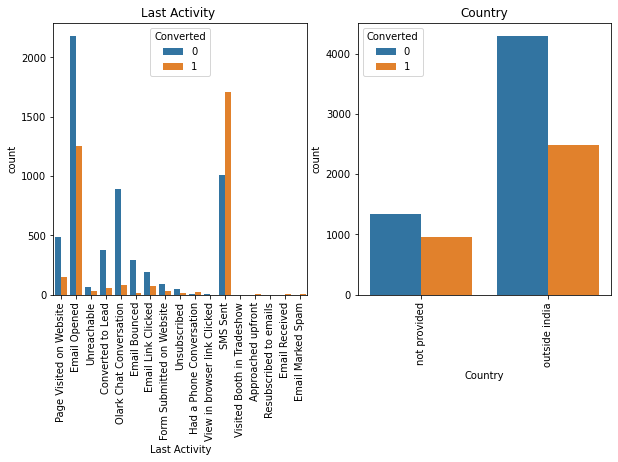

In [88]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data=lead).tick_params(axis='x', rotation = 90)
plt.title('Last Activity ')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data=lead).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()


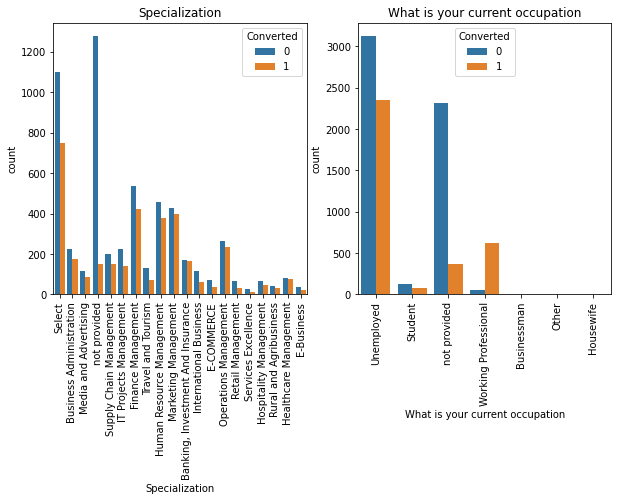

In [89]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data=lead).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data=lead).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

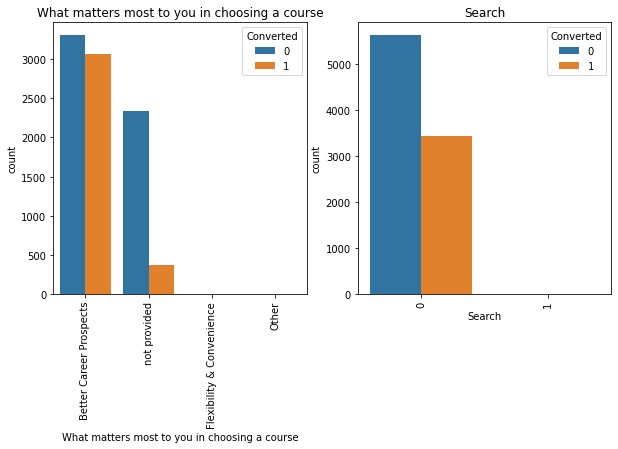

In [90]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data=lead).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data=lead).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

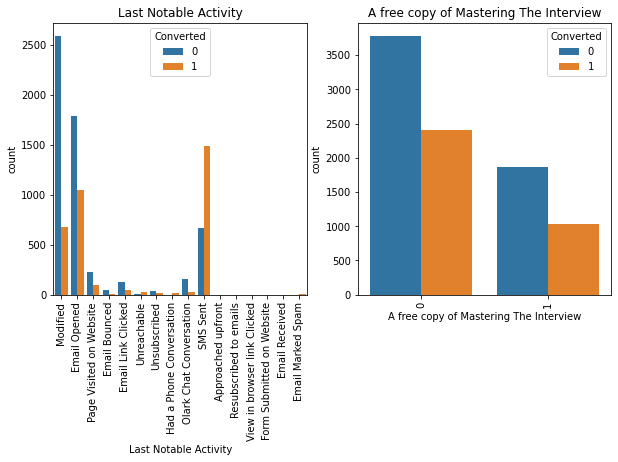

In [91]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Notable Activity', hue='Converted', data=lead).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data=lead).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

In [92]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,not provided,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,outside india,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,outside india,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,outside india,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,outside india,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Modified


## Dummy Variables

In [93]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   int64  
 3   Do Not Call                                    9074 non-null   int64  
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

In [94]:
lead.loc[:, lead.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Last Notable Activity'], dtype='object')

In [95]:
# create dummy variables 
dummy = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Last Notable Activity']])

lead_final = pd.concat([lead,dummy], axis=1)
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,not provided,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,outside india,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,outside india,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,outside india,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,outside india,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Modified


In [96]:
lead_final_dum = lead_final.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course','Last Notable Activity'], 1)
lead_final_dum.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_not provided,Country_outside india,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_not provided,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

   ## Test - Train Split

In [97]:
#Create X variable
X = lead_final_dum.drop(['Converted'], 1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_not provided,Country_outside india,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_not provided,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1

In [98]:
#create y variable & add target vaiable in y
y = lead_final_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=10)

In [100]:
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_not provided,Country_outside india,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_not provided,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1289,0,0,0.014184,0.612676,0.083333,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3604,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5584,1,0,0.042553,0.751761,0.250000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7679,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,1,0,

## Model Building

In [105]:
log = LogisticRegression()

In [ ]:
# Running RFE with 15 variables as output
rfe = RFE(log, 15)
rfe = rfe.fit(X_train, y_train)

In [ ]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [ ]:
# Put all the columns selected by RFE in the variable 'col'
rfe_col = X_train.columns[rfe.support_]

In [ ]:
X_train = X_train[rfe_col]

In [ ]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2632.6
Date:                Tue, 13 Sep 2022   Deviance:                       5265.2
Time:                        19:28:17   Pearson chi2:                 6.48e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -0.7251      0.091     -7.990      0.000      -0.903      -0.547
Do Not Email                                                  -1.4299      0.171     -8.342      0.000      -1.766      -1.094
TotalVisits                                                    5.9130      1.488      3.973      0.000       2.996       8.830
Total Time Spent on Website                                    4.6907      0.169     27.704      0.000       4.359       5.023
Lead Origin_Lead Add Form                                      2.2114      0.227      9.755      0.000       1.767       2.656
Lead Source_Welingak Website                                   2.5805      1.032      2.500      0.012       0.557       4.604
Last Activity_Approached upfront                              23.9572   4.41e+04      0.001      1.000   -8.64e+04    8.65e+04
Last Activity_Had a Phone Conversation                         0.5580      0.845      0.660      0.509      -1.099       2.215
Last Activity_Olark Chat Conversation                         -1.3415      0.166     -8.091      0.000      -1.666      -1.017
Last Activity_SMS Sent                                         1.2813      0.074     17.316      0.000       1.136       1.426
Country_outside india                                         -1.6056      0.115    -14.019      0.000      -1.830      -1.381
What is your current occupation_Housewife                     24.3648   3.21e+04      0.001      0.999   -6.29e+04     6.3e+04
What is your current occupation_Working Professional           2.5055      0.194     12.902      0.000       2.125       2.886
What matters most to you in choosing a course_not provided    -1.1860      0.086    -13.826      0.000      -1.354      -1.018
Last Notable Activity_Had a Phone Conversation                23.5185   2.24e+04      0.001      0.999   -4.39e+04     4.4e+04
Last Notable Activity_Unreachable                              1.8339      0.602      3.047      0.002       0.654       3.013
==============================================================================================================================
"""

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# VIF dataframe for all variables
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Country_outside india,4.05
2,Total Time Spent on Website,2.42
1,TotalVisits,2.31
6,Last Activity_Had a Phone Conversation,1.89
13,Last Notable Activity_Had a Phone Conversation,1.89
8,Last Activity_SMS Sent,1.48
3,Lead Origin_Lead Add Form,1.47
12,What matters most to you in choosing a course_...,1.38
4,Lead Source_Welingak Website,1.31
11,What is your current occupation_Working Profes...,1.18


In [ ]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [ ]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2637.9
Date:                Tue, 13 Sep 2022   Deviance:                       5275.8
Time:                        19:28:17   Pearson chi2:                 6.49e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -0.7243      0.091     -7.987      0.000      -0.902      -0.547
Do Not Email                                                  -1.4334      0.171     -8.364      0.000      -1.769      -1.097
TotalVisits                                                    5.8263      1.480      3.938      0.000       2.926       8.726
Total Time Spent on Website                                    4.6828      0.169     27.702      0.000       4.352       5.014
Lead Origin_Lead Add Form                                      2.2342      0.227      9.857      0.000       1.790       2.678
Lead Source_Welingak Website                                   2.5596      1.032      2.479      0.013       0.536       4.583
Last Activity_Approached upfront                              22.9550   2.67e+04      0.001      0.999   -5.24e+04    5.24e+04
Last Activity_Had a Phone Conversation                         0.5507      0.846      0.651      0.515      -1.107       2.208
Last Activity_Olark Chat Conversation                         -1.3434      0.166     -8.104      0.000      -1.668      -1.019
Last Activity_SMS Sent                                         1.2750      0.074     17.248      0.000       1.130       1.420
Country_outside india                                         -1.5934      0.114    -13.959      0.000      -1.817      -1.370
What is your current occupation_Working Professional           2.4994      0.194     12.874      0.000       2.119       2.880
What matters most to you in choosing a course_not provided    -1.1889      0.086    -13.869      0.000      -1.357      -1.021
Last Notable Activity_Had a Phone Conversation                22.5181   1.36e+04      0.002      0.999   -2.66e+04    2.67e+04
Last Notable Activity_Unreachable                              1.8276      0.602      3.037      0.002       0.648       3.007
==============================================================================================================================
"""

In [ ]:
# VIF dataframe for all variables
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Country_outside india,4.04
2,Total Time Spent on Website,2.42
1,TotalVisits,2.31
6,Last Activity_Had a Phone Conversation,1.89
12,Last Notable Activity_Had a Phone Conversation,1.89
8,Last Activity_SMS Sent,1.48
3,Lead Origin_Lead Add Form,1.46
11,What matters most to you in choosing a course_...,1.38
4,Lead Source_Welingak Website,1.31
10,What is your current occupation_Working Profes...,1.18


In [ ]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [ ]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2641.4
Date:                Tue, 13 Sep 2022   Deviance:                       5282.9
Time:                        19:28:18   Pearson chi2:                 6.48e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -0.7235      0.091     -7.979      0.000      -0.901      -0.546
Do Not Email                                                  -1.4369      0.171     -8.391      0.000      -1.772      -1.101
TotalVisits                                                    5.8807      1.481      3.971      0.000       2.979       8.783
Total Time Spent on Website                                    4.6740      0.169     27.679      0.000       4.343       5.005
Lead Origin_Lead Add Form                                      2.2301      0.227      9.838      0.000       1.786       2.674
Lead Source_Welingak Website                                   2.5635      1.032      2.483      0.013       0.540       4.587
Last Activity_Approached upfront                              21.9544   1.62e+04      0.001      0.999   -3.18e+04    3.18e+04
Last Activity_Had a Phone Conversation                         1.9050      0.676      2.819      0.005       0.581       3.229
Last Activity_Olark Chat Conversation                         -1.3431      0.166     -8.103      0.000      -1.668      -1.018
Last Activity_SMS Sent                                         1.2750      0.074     17.251      0.000       1.130       1.420
Country_outside india                                         -1.5923      0.114    -13.951      0.000      -1.816      -1.369
What is your current occupation_Working Professional           2.4978      0.194     12.866      0.000       2.117       2.878
What matters most to you in choosing a course_not provided    -1.1910      0.086    -13.892      0.000      -1.359      -1.023
Last Notable Activity_Unreachable                              1.8268      0.602      3.037      0.002       0.648       3.006
==============================================================================================================================
"""

In [ ]:
# VIF dataframe for all variables
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Country_outside india,4.04
2,Total Time Spent on Website,2.42
1,TotalVisits,2.31
8,Last Activity_SMS Sent,1.48
3,Lead Origin_Lead Add Form,1.46
11,What matters most to you in choosing a course_...,1.38
4,Lead Source_Welingak Website,1.31
10,What is your current occupation_Working Profes...,1.18
7,Last Activity_Olark Chat Conversation,1.12
0,Do Not Email,1.10


In [ ]:
X_train.drop('Last Activity_Approached upfront', axis = 1, inplace = True)

In [ ]:
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2644.2
Date:                Tue, 13 Sep 2022   Deviance:                       5288.4
Time:                        19:28:18   Pearson chi2:                 6.49e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -0.7120      0.090     -7.874      0.000      -0.889      -0.535
Do Not Email                                                  -1.4386      0.171     -8.402      0.000      -1.774      -1.103
TotalVisits                                                    5.8751      1.480      3.970      0.000       2.974       8.776
Total Time Spent on Website                                    4.6762      0.169     27.691      0.000       4.345       5.007
Lead Origin_Lead Add Form                                      2.2205      0.227      9.798      0.000       1.776       2.665
Lead Source_Welingak Website                                   2.5639      1.032      2.483      0.013       0.540       4.587
Last Activity_Had a Phone Conversation                         1.9029      0.676      2.816      0.005       0.578       3.227
Last Activity_Olark Chat Conversation                         -1.3504      0.166     -8.150      0.000      -1.675      -1.026
Last Activity_SMS Sent                                         1.2717      0.074     17.212      0.000       1.127       1.416
Country_outside india                                         -1.6016      0.114    -14.047      0.000      -1.825      -1.378
What is your current occupation_Working Professional           2.4955      0.194     12.855      0.000       2.115       2.876
What matters most to you in choosing a course_not provided    -1.1945      0.086    -13.937      0.000      -1.362      -1.027
Last Notable Activity_Unreachable                              1.8240      0.602      3.032      0.002       0.645       3.003
==============================================================================================================================
"""

In [ ]:
# VIF dataframe for all variables
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Country_outside india,4.04
2,Total Time Spent on Website,2.42
1,TotalVisits,2.31
7,Last Activity_SMS Sent,1.48
3,Lead Origin_Lead Add Form,1.46
10,What matters most to you in choosing a course_...,1.38
4,Lead Source_Welingak Website,1.31
9,What is your current occupation_Working Profes...,1.18
6,Last Activity_Olark Chat Conversation,1.12
0,Do Not Email,1.10


## Creating Prediction

In [ ]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289    0.653572
3604    0.129375
5584    0.234824
7679    0.129375
7563    0.503833
7978    0.782656
7780    0.168697
7863    0.983248
838     0.768465
708     0.148026
dtype: float64

In [ ]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.65357163, 0.12937452, 0.23482391, 0.12937452, 0.50383326,
       0.78265639, 0.16869713, 0.98324814, 0.76846462, 0.14802572])

In [ ]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.653572
1,0,0.129375
2,0,0.234824
3,0,0.129375
4,0,0.503833


In [ ]:
# Substituting 0 or 1 with the cut off as 0.4
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.653572,1
1,0,0.129375,0
2,0,0.234824,0
3,0,0.129375,0
4,0,0.503833,1


## Model Evaluation

In [ ]:
from sklearn import metrics


In [ ]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3260,  635],
       [ 573, 1883]], dtype=int64)

In [ ]:
# Predicted     not_churn    churn
# Actual
# not_churn        3403       492
# churn             729      1727

In [ ]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8097937332703511

In [ ]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [ ]:
# Calculating the sensitivity
TP/(TP+FN)

0.7666938110749185

In [ ]:
# Calculating the specificity
TN/(TN+FP)

0.8369704749679076

## Optimise Cut off (ROC Curve)

In [ ]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

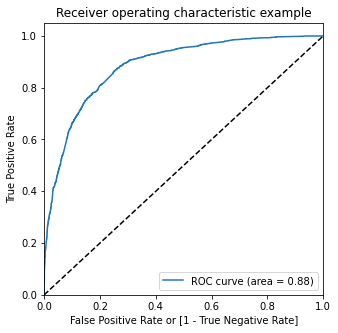

In [ ]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [ ]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.653572,1,1,1,1,1,1,1,1,0,0,0
1,0,0.129375,0,1,1,0,0,0,0,0,0,0,0
2,0,0.234824,0,1,1,1,0,0,0,0,0,0,0
3,0,0.129375,0,1,1,0,0,0,0,0,0,0,0
4,0,0.503833,1,1,1,1,1,1,1,0,0,0,0


In [ ]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.579594,0.984935,0.324005
0.2,0.2,0.760353,0.914495,0.663158
0.3,0.3,0.790584,0.876221,0.736585
0.4,0.4,0.809794,0.766694,0.836970
0.5,0.5,0.809164,0.697068,0.879846
0.6,0.6,0.803496,0.629886,0.912965
0.7,0.7,0.772162,0.502036,0.942490
0.8,0.8,0.752952,0.413274,0.967137
0.9,0.9,0.706503,0.258958,0.988703


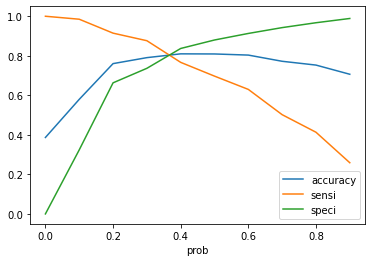

In [ ]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.653572,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.129375,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.234824,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.129375,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.503833,1,1,1,1,1,1,1,0,0,0,0,1


In [ ]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8019209573295544

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3149,  746],
       [ 512, 1944]], dtype=int64)

In [ ]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [ ]:
# Calculating the sensitivity
TP/(TP+FN)

0.7915309446254072

In [ ]:
# Calculating the specificity
TN/(TN+FP)

0.8084724005134788

## Prediction on Test set

In [ ]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])


In [ ]:
# Substituting all the columns in the final train model
col = X_train.columns

In [ ]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Country_outside india,What is your current occupation_Working Professional,What matters most to you in choosing a course_not provided,Last Notable Activity_Unreachable
8308,1.0,0,0.035461,0.416813,0,0,0,0,0,1,0,0,0
7212,1.0,0,0.028369,0.001320,0,0,0,0,1,1,1,0,0
2085,1.0,0,0.000000,0.000000,1,1,0,0,0,0,0,0,0
4048,1.0,0,0.028369,0.617077,0,0,0,0,1,1,0,0,0
4790,1.0,0,0.028369,0.005282,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1.0,0,0.000000,0.000000,0,0,0,1,0,0,0,0,0
8179,1.0,0,0.170213,0.148768,0,0,0,0,1,1,0,1,0
6236,1.0,0,0.000000,0.000000,0,0,0,0,0,0,0,1,0
5240,1.0,0,0.078014,0.458627,0,0,0,0,1,1,0,0,0


In [ ]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.461049
1,1,0.835679
2,1,0.983248
3,1,0.881881
4,0,0.106958


In [ ]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.461049,1
1,1,0.835679,1
2,1,0.983248,1
3,1,0.881881,1
4,0,0.106958,0
...,...,...,...
2718,1,0.112804,0
2719,0,0.368022,1
2720,0,0.129375,0
2721,1,0.826509,1


In [ ]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8108703635695924

In [ ]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2


array([[1414,  330],
       [ 185,  794]], dtype=int64)

In [ ]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [ ]:
# Calculating the sensitivity
TP/(TP+FN)

0.8110316649642493

In [ ]:
# Calculating the specificity
TN/(TN+FP)

0.8107798165137615

## Precision-Recall

In [ ]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3260,  635],
       [ 573, 1883]], dtype=int64)

In [ ]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7478157267672756

In [ ]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7666938110749185

## Precision and recall tradeoff

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score



In [ ]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       1
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

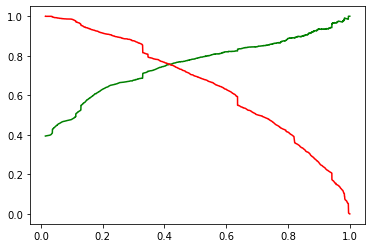

In [ ]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.653572,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.129375,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.234824,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.129375,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.503833,1,1,1,1,1,1,1,0,0,0,0,1


In [ ]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8119981105337742

In [ ]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2


array([[3288,  607],
       [ 587, 1869]], dtype=int64)

In [ ]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [ ]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7548465266558966

In [ ]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7609934853420195

## Prediction on Test set

In [ ]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.461049
1,1,0.835679
2,1,0.983248
3,1,0.881881
4,0,0.106958


In [ ]:

# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.461049,1
1,1,0.835679,1
2,1,0.983248,1
3,1,0.881881,1
4,0,0.106958,0
...,...,...,...
2718,1,0.112804,0
2719,0,0.368022,0
2720,0,0.129375,0
2721,1,0.826509,1


In [ ]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8163789937568858

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1472,  272],
       [ 228,  751]], dtype=int64)

In [ ]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [ ]:
# specificity = TN / TP + FP
TN / (TN + FP)

0.8440366972477065

In [ ]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7671092951991828

In [ ]:
# precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.7341153470185728
recall  0.7671092951991828


With the 0.41 Cut-off we get the 73% Precision & 76% Recall value

# Conclusion

### Data Insights - 
- This model has an ability to adjust with the company’s requirements in coming future.
- The Accuracy, Precision and Recall score we got from test set are in acceptable  range.
- the variables that mattered the most in the potential buyers are as per below -
 
 1) Total Visits
 
 2) The total time spent on the Website.
 
 3) Last activity was: a. SMS, b. Olark chat conversation
 
 4) What is your current occupation Working Professional
 
 5) Lead Origin Lead Add Form